# Sales of summer clothes in E-commerce Wish
### Data Science project from Kaggle: 
https://www.kaggle.com/jmmvutu/summer-products-and-sales-in-ecommerce-wish

#### 
### Task description
Re-stocking products with the best potential is crucial for shops and businesses around the world.
Through this dataset and task, you are requested to build a model that can help predict how well a product is going to sell.
Such a model has many implications and could be used in many different ways, the most straightforward being to adjust how much of a product should be kept in stock.
This would allow you to better understand e-commerce sales and get you a certain expertise for helping businesses optimize their stocks and sales.

### Load dataset

In [1]:
# import libraries for exploratory data analysis
import pandas as pd # data analysis
import numpy as np # linear algebra

# import libraries to visualise the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to encode with feature-engine
from feature_engine.encoding import CountFrequencyEncoder

In [2]:
# load dataset
data = pd.read_csv('dataset/summer-products-with-rating-and-performance_2020-08.csv')

data.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


In [3]:
# columns of dataset
data.columns

Index(['title', 'title_orig', 'price', 'retail_price', 'currency_buyer',
       'units_sold', 'uses_ad_boosts', 'rating', 'rating_count',
       'rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'product_url', 'product_picture',
       'product_id', 'theme', 'crawl_month'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

### Data cleaning and feature engineering

### Handle Missing value

In [5]:
# number of columns with missing values
len(data.isnull().sum())

43

In [6]:
# number of missing values in each columns
data.isnull().sum().sort_values(ascending=False)

merchant_profile_picture        1347
has_urgency_banner              1100
urgency_text                    1100
rating_one_count                  45
rating_two_count                  45
rating_three_count                45
rating_four_count                 45
rating_five_count                 45
product_color                     41
origin_country                    17
product_variation_size_id         14
merchant_name                      4
merchant_info_subtitle             1
crawl_month                        0
badges_count                       0
rating_count                       0
badge_product_quality              0
rating                             0
uses_ad_boosts                     0
units_sold                         0
currency_buyer                     0
retail_price                       0
price                              0
title_orig                         0
badge_local_product                0
product_variation_inventory        0
badge_fast_shipping                0
m

100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         49
50000      17
100000      6
8           4
1           3
7           2
3           2
2           2
6           1
Name: units_sold, dtype: int64


<AxesSubplot:xlabel='units_sold'>

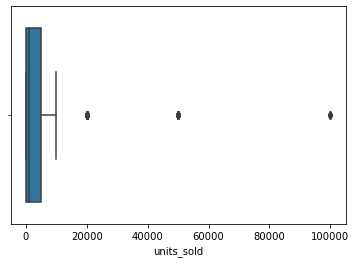

In [7]:
# values that represent the success of products
print(data['units_sold'].value_counts())
sns.boxplot(x='units_sold',data=data)

In [8]:
# treat sales units below 10 as outlier
data['units_sold'].replace(range(10),10,inplace=True)
data['units_sold'].value_counts()

100       509
1000      405
5000      217
10000     177
20000     103
50         76
10         63
50000      17
100000      6
Name: units_sold, dtype: int64

<AxesSubplot:xlabel='units_sold', ylabel='count'>

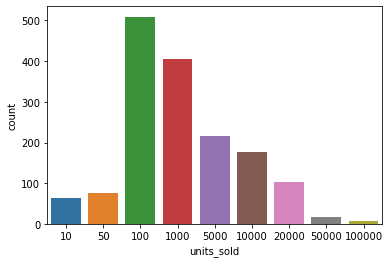

In [9]:
# show the distribution of units_sold
sns.countplot(x='units_sold',data=data)

In [10]:
# To determin whether a product is successful or not successful
# we introduce a new binary value 'successful_product' depending on sales units
# and set the criteria at 10000 items
data['units_sold'].replace([10000,20000,50000,100000],1,inplace=True)
data['units_sold'].replace([10,50,100,1000,5000],0,inplace=True)

0    1270
1     303
Name: successful_product, dtype: int64


<AxesSubplot:xlabel='successful_product', ylabel='Count'>

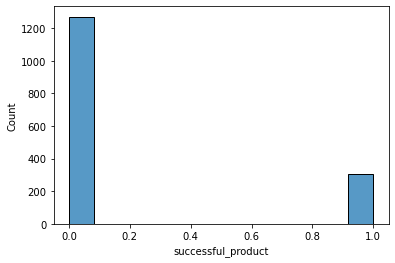

In [11]:
data.rename(columns={'units_sold':'successful_product'},inplace=True)

# Show the changed values
print(data['successful_product'].value_counts())
sns.histplot(data['successful_product'])

In [12]:
# Three columns have over 1000 missing values
data.isnull().sum().sort_values(ascending=False).head(3)

merchant_profile_picture    1347
has_urgency_banner          1100
urgency_text                1100
dtype: int64

In [13]:
# Take an inspect of the three coloumns
data['merchant_profile_picture'].unique()

array([nan,
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5652f4053a698c76dc9a3f37.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_55ed5a3362e273427107759e.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_539937d634067e06707b1a8e.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_57108cd6a995b507211ef8fb.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5268759b736046671957190c.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5660e53e769a564b3e3aeca0.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_55e7e41e606d0a18fdfc67d1.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_580f06685250a20783d33e56.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_577fb2b368116418674befd9.jpg'

In [14]:
data['has_urgency_banner'].value_counts()

1.0    473
Name: has_urgency_banner, dtype: int64

In [15]:
data['urgency_text'].value_counts()

Quantité limitée !                  472
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

In [16]:
# encode these columns
data['merchant_profile_picture'].replace(np.nan,0,inplace=True)
data['has_urgency_banner'].replace(np.nan,0,inplace=True)
data['urgency_text'].replace(np.nan,0,inplace=True)

In [17]:
data['merchant_profile_picture'].replace([i for i in data['merchant_profile_picture'] if i != 0],1,inplace=True)

# drop the column merchant_has_profile_picture to avoid redundancy
data.drop(labels='merchant_has_profile_picture',axis=1,inplace=True)

In [18]:
data['urgency_text'].replace('Quantité limitée !',1,inplace=True)
data['urgency_text'].replace('Réduction sur les achats en gros',1,inplace=True)

In [19]:
data.rename({'urgency_text':'quantity_limited'},inplace=True)

rating_one_count               45
rating_two_count               45
rating_three_count             45
rating_four_count              45
rating_five_count              45
product_color                  41
origin_country                 17
product_variation_size_id      14
merchant_name                   4
merchant_info_subtitle          1
rating                          0
tags                            0
uses_ad_boosts                  0
successful_product              0
currency_buyer                  0
retail_price                    0
price                           0
title_orig                      0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
rating_count                    0
crawl_month                     0
theme                           0
product_variation_inventory     0
product_id                      0
product_picture                 0
product_url                     0
merchant_profi

<AxesSubplot:>

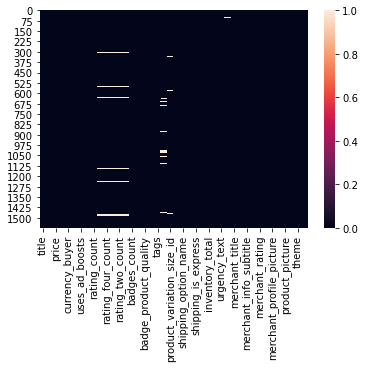

In [20]:
# check the missing values again
print(data.isnull().sum().sort_values(ascending=False))
sns.heatmap(data.isnull())

In [21]:
# the missing values in columns rating count are almost identical
# check these columns

a = data['rating_five_count'][data['rating_five_count'].isnull()].index.to_list()
data.iloc[a,[8,9,10,11,12,13]]

,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count
74,0,NaN,NaN,NaN,NaN,NaN
112,0,NaN,NaN,NaN,NaN,NaN
126,0,NaN,NaN,NaN,NaN,NaN
189,0,NaN,NaN,NaN,NaN,NaN
216,0,NaN,NaN,NaN,NaN,NaN
248,0,NaN,NaN,NaN,NaN,NaN
309,0,NaN,NaN,NaN,NaN,NaN
346,0,NaN,NaN,NaN,NaN,NaN
348,0,NaN,NaN,NaN,NaN,NaN
375,0,NaN,NaN,NaN,NaN,NaN


In [22]:
# impute the missing value with zero
data['rating_five_count'].replace(np.nan,0,inplace=True)
data['rating_four_count'].replace(np.nan,0,inplace=True)
data['rating_three_count'].replace(np.nan,0,inplace=True)
data['rating_two_count'].replace(np.nan,0,inplace=True)
data['rating_one_count'].replace(np.nan,0,inplace=True)

In [23]:
# check the missing value again
data.isnull().sum().sort_values(ascending=False)

product_color                  41
origin_country                 17
product_variation_size_id      14
merchant_name                   4
merchant_info_subtitle          1
price                           0
rating_four_count               0
badge_fast_shipping             0
badge_product_quality           0
badge_local_product             0
badges_count                    0
rating_one_count                0
rating_two_count                0
rating_three_count              0
rating_five_count               0
retail_price                    0
title_orig                      0
tags                            0
rating                          0
uses_ad_boosts                  0
successful_product              0
currency_buyer                  0
rating_count                    0
crawl_month                     0
theme                           0
product_variation_inventory     0
product_id                      0
product_picture                 0
product_url                     0
merchant_profi

In [24]:
# check the column product color
color = pd.DataFrame(data['product_color'].value_counts())
color['percentage'] = color['product_color'] / len(data)
color.head(20)

,product_color,percentage
black,302,0.191990
white,254,0.161475
yellow,105,0.066751
pink,99,0.062937
blue,99,0.062937
red,93,0.059123
green,90,0.057216
grey,71,0.045137
purple,53,0.033694
armygreen,31,0.019708


In [25]:
less_color = list(set(color.index) - set(color.head(8).index))

#encode the values
data['product_color'].replace(np.nan,'other',inplace=True)
data['product_color'].replace(less_color,'other',inplace=True)

In [26]:
data['product_color'].value_counts()

other     460
black     302
white     254
yellow    105
blue       99
pink       99
red        93
green      90
grey       71
Name: product_color, dtype: int64

In [27]:
# check the colum origin country
data['origin_country'].value_counts()

CN    1516
US      31
VE       5
SG       2
GB       1
AT       1
Name: origin_country, dtype: int64

In [28]:
# encode this column
data['origin_country'].replace(['VE','SG','GB','AT',np.nan],'Other',inplace=True)

In [29]:
# check product_variation_size_id 
print(data['product_variation_size_id'].value_counts())
print("\n",data['product_variation_size_id'].unique())

S                  641
XS                 356
M                  200
XXS                100
L                   49
                  ... 
Baby Float Boat      1
60                   1
5                    1
04-3XL               1
Round                1
Name: product_variation_size_id, Length: 106, dtype: int64

 ['M' 'XS' 'S' 'Size-XS' 'M.' 'XXS' 'L' 'XXL' nan 'S.' 's' 'choose a size'
 'XS.' '32/L' 'Suit-S' 'XXXXXL' 'EU 35' '4' 'Size S.' '1m by 3m' '3XL'
 'Size S' 'XL' 'Women Size 36' 'US 6.5 (EU 37)' 'XXXS' 'SIZE XS'
 '26(Waist 72cm 28inch)' 'Size XXS' '29' '1pc' '100 cm' 'One Size'
 'SIZE-4XL' '1' 'S/M(child)' '2pcs' 'XXXL' 'S..' '30 cm' '5XL' '33'
 'Size M' '100 x 100cm(39.3 x 39.3inch)' '100pcs' '2XL' '4XL' 'SizeL'
 'SIZE XXS' 'XXXXL' 'Base & Top & Matte Top Coat' 'size S' '35' '34'
 'SIZE-XXS' 'S(bust 88cm)' 'S (waist58-62cm)' 'S(Pink & Black)' '20pcs'
 'US-S' 'Size -XXS' 'X   L' 'White' '25' 'Size-S' 'Round' 'Pack of 1'
 '1 pc.' 'S Diameter 30cm' '6XL' 'AU plug Low quality' '5PAI

In [30]:
sum(data['product_variation_size_id'].value_counts()>1)

43

In [31]:
# encode this column
common_size = list(data['product_variation_size_id'].value_counts().head(8).index)
rare_size = list(set(data['product_variation_size_id'].unique())-set(common_size))

common_size, rare_size

(['S', 'XS', 'M', 'XXS', 'L', 'S.', 'XL', 'XXL'],
 [nan,
  'Round',
  '17',
  'XXXS',
  'S/M(child)',
  '1',
  'One Size',
  'H01',
  'White',
  'US 6.5 (EU 37)',
  '34',
  '5XL',
  '20pcs',
  'SIZE S',
  'daughter 24M',
  'EU39(US8)',
  'Base & Top & Matte Top Coat',
  '30 cm',
  'Baby Float Boat',
  '33',
  'S Diameter 30cm',
  'B',
  'S(bust 88cm)',
  'Base Coat',
  's',
  'SIZE XXS',
  '1 pc.',
  'Size-L',
  'Size XXS',
  '2pcs',
  'choose a size',
  'size S',
  '100 x 100cm(39.3 x 39.3inch)',
  '80 X 200 CM',
  '3 layered anklet',
  'Size S',
  'SIZE XS',
  '10pcs',
  'pants-S',
  'Size-XS',
  '4XL',
  '20PCS-10PAIRS',
  'SIZE-XXS',
  'M.',
  '1pc',
  'L.',
  'S (waist58-62cm)',
  '100pcs',
  '6XL',
  '3XL',
  '10 ml',
  'Floating Chair for Kid',
  'Suit-S',
  '60',
  'Size--S',
  '5',
  '04-3XL',
  'Women Size 37',
  '35',
  '2',
  '25',
  '4-5 Years',
  'SizeL',
  'Size M',
  '1 PC - XL',
  '5PAIRS',
  '40 cm',
  'S(Pink & Black)',
  'AU plug Low quality',
  'XXXXL',
  'Size-5XL

In [32]:
data['product_variation_size_id'].replace('S.','S',inplace=True)
data['product_variation_size_id'].replace(rare_size,'other',inplace=True)

In [33]:
data['product_variation_size_id'].value_counts()

S        659
XS       356
M        200
other    177
XXS      100
L         49
XL        17
XXL       15
Name: product_variation_size_id, dtype: int64

In [34]:
# check if there is missing value
data.isnull().sum()

title                          0
title_orig                     0
price                          0
retail_price                   0
currency_buyer                 0
successful_product             0
uses_ad_boosts                 0
rating                         0
rating_count                   0
rating_five_count              0
rating_four_count              0
rating_three_count             0
rating_two_count               0
rating_one_count               0
badges_count                   0
badge_local_product            0
badge_product_quality          0
badge_fast_shipping            0
tags                           0
product_color                  0
product_variation_size_id      0
product_variation_inventory    0
shipping_option_name           0
shipping_option_price          0
shipping_is_express            0
countries_shipped_to           0
inventory_total                0
has_urgency_banner             0
urgency_text                   0
origin_country                 0
merchant_t

In [35]:
# drop the missing values in columns merchant_name, merchant_info_subtitle
data = data.dropna() # now only two columns with missing value

In [36]:
# check again
data.isnull().sum()>0

title                          False
title_orig                     False
price                          False
retail_price                   False
currency_buyer                 False
successful_product             False
uses_ad_boosts                 False
rating                         False
rating_count                   False
rating_five_count              False
rating_four_count              False
rating_three_count             False
rating_two_count               False
rating_one_count               False
badges_count                   False
badge_local_product            False
badge_product_quality          False
badge_fast_shipping            False
tags                           False
product_color                  False
product_variation_size_id      False
product_variation_inventory    False
shipping_option_name           False
shipping_option_price          False
shipping_is_express            False
countries_shipped_to           False
inventory_total                False
h

### Categorical encoding

In [37]:
# check the data type of each columns
for col in data.columns:
    print(col,": ",data[col].dtype)

# make list of variables types

# numerical: discrete and continuous
discrete = [var for var in data.columns if data[var].dtype!='O'and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O'and var not in discrete]

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O']

print('\nThere are {} discrete variables'.format(len(discrete)))
print('There are {} continuous variables'.format(len(continuous)))
print('There are {} categorical variables'.format(len(categorical)))

title :  object
title_orig :  object
price :  float64
retail_price :  int64
currency_buyer :  object
successful_product :  int64
uses_ad_boosts :  int64
rating :  float64
rating_count :  int64
rating_five_count :  float64
rating_four_count :  float64
rating_three_count :  float64
rating_two_count :  float64
rating_one_count :  float64
badges_count :  int64
badge_local_product :  int64
badge_product_quality :  int64
badge_fast_shipping :  int64
tags :  object
product_color :  object
product_variation_size_id :  object
product_variation_inventory :  int64
shipping_option_name :  object
shipping_option_price :  int64
shipping_is_express :  int64
countries_shipped_to :  int64
inventory_total :  int64
has_urgency_banner :  float64
urgency_text :  int64
origin_country :  object
merchant_title :  object
merchant_name :  object
merchant_info_subtitle :  object
merchant_rating_count :  int64
merchant_rating :  float64
merchant_id :  object
merchant_profile_picture :  int64
product_url :  object

In [38]:
# In this section we handle object data
categorical

['title',
 'title_orig',
 'currency_buyer',
 'tags',
 'product_color',
 'product_variation_size_id',
 'shipping_option_name',
 'origin_country',
 'merchant_title',
 'merchant_name',
 'merchant_info_subtitle',
 'merchant_id',
 'product_url',
 'product_picture',
 'product_id',
 'theme',
 'crawl_month']

In [39]:
data[categorical].nunique()

title                        1199
title_orig                   1201
currency_buyer                  1
tags                         1228
product_color                   9
product_variation_size_id       8
shipping_option_name           15
origin_country                  3
merchant_title                956
merchant_name                 956
merchant_info_subtitle       1056
merchant_id                   956
product_url                  1338
product_picture              1338
product_id                   1338
theme                           1
crawl_month                     1
dtype: int64

In [40]:
# check the column shipping option
data['shipping_option_name'].unique()

array(['Livraison standard', 'Envio Padrão', 'Standart Gönderi',
       'Standardversand', 'Envío normal', 'Standardowa wysyłka',
       'الشحن القياسي', 'Expediere Standard', 'การส่งสินค้ามาตรฐาน',
       'Standard Shipping', 'ការដឹកជញ្ជូនតាមស្តង់ដារ',
       'Livraison Express', 'Стандартная доставка', 'Spedizione standard',
       'Ekspresowa wysyłka'], dtype=object)

In [41]:
# encode this column into binary variables
data['shipping_option_name'].replace(['Livraison standard', 'Envio Padrão', 'Standart Gönderi',
       'Standardversand', 'Envío normal', 'Standardowa wysyłka','الشحن القياسي', 'Expediere Standard', 
       'การส่งสินค้ามาตรฐาน','Standard Shipping', 'ការដឹកជញ្ជូនតាមស្តង់ដារ','Стандартная доставка', 
       'Spedizione standard'],1,inplace=True)
data['shipping_option_name'].replace(['Livraison Express','Ekspresowa wysyłka'],0,inplace=True)


data.rename({'shipping_option_name':'standard_shipping'},axis=1,inplace=True)
data['standard_shipping'].unique()

array([1, 0], dtype=int64)

In [42]:
# show the categorical variables with high cardinality
data[['title','title_orig','merchant_title',
      'merchant_name','merchant_info_subtitle','merchant_id',
      'product_url','product_picture','product_id']].head(3)

,title,title_orig,merchant_title,merchant_name,merchant_info_subtitle,merchant_id,product_url,product_picture,product_id
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,zgrdejia,zgrdejia,(568 notes),595097d6a26f6e070cb878d1,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,SaraHouse,sarahouse,"83 % avis positifs (17,752 notes)",56458aa03a698c35c9050988,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,hxt520,hxt520,86 % avis positifs (295 notes),5d464a1ffdf7bc44ee933c65,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a


In [43]:
# extract the specifi string from two columns
product_url = data['product_url'].str.split(pat='com/c/').apply(lambda x: x[-1])
product_picture = data['product_picture'].str.split(pat='webimage/').apply(lambda x: x[-1])

# check if the id are identical
(product_picture == product_url).sum()

0

In [44]:
# drop the duplicated columns
data.drop(labels=['product_url','product_picture'],axis=1,inplace=True)

In [45]:
# column title_orig is the English version of column title
# drop the column title to avoid redundancy
data.drop(labels='title',axis=1,inplace=True)

In [46]:
# check the columns about merchant
data_merchant = data[['merchant_title','merchant_name','merchant_info_subtitle','merchant_id']]
data_merchant.nunique()

merchant_title             956
merchant_name              956
merchant_info_subtitle    1056
merchant_id                956
dtype: int64

In [47]:
# columns about merchant are too complicated and seems not useful for building the algorithm
# drop these columns
data.drop(labels=data_merchant.columns,axis=1,inplace=True)

In [48]:
# categorical variables with only one category are usually useless for the algorithm
data.drop(labels=['theme','crawl_month','currency_buyer'],inplace=True,axis=1)

# drop column title, tags and product_id
data.drop(labels=['title_orig','product_id','tags'],axis=1,inplace=True)
# check the data again
data.head(4)

,price,retail_price,successful_product,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_rating_count,merchant_rating,merchant_profile_picture
0,16.0,14,0,0,3.76,54,26.0,8.0,10.0,1.0,...,4,0,34,50,1.0,1,CN,568,4.128521,0
1,8.0,22,1,1,3.45,6135,2269.0,1027.0,1118.0,644.0,...,2,0,41,50,1.0,1,CN,17752,3.899673,0
2,8.0,43,0,0,3.57,14,5.0,4.0,2.0,0.0,...,3,0,36,50,1.0,1,CN,295,3.989831,0
3,8.0,8,0,1,4.03,579,295.0,119.0,87.0,42.0,...,2,0,41,50,0.0,0,CN,23832,4.020435,0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1568 entries, 0 to 1572
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        1568 non-null   float64
 1   retail_price                 1568 non-null   int64  
 2   successful_product           1568 non-null   int64  
 3   uses_ad_boosts               1568 non-null   int64  
 4   rating                       1568 non-null   float64
 5   rating_count                 1568 non-null   int64  
 6   rating_five_count            1568 non-null   float64
 7   rating_four_count            1568 non-null   float64
 8   rating_three_count           1568 non-null   float64
 9   rating_two_count             1568 non-null   float64
 10  rating_one_count             1568 non-null   float64
 11  badges_count                 1568 non-null   int64  
 12  badge_local_product          1568 non-null   int64  
 13  badge_product_qual

### Feature Selection with feature engine

In [50]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels='successful_product', axis=1),
    data['successful_product'],
    test_size=0.3,
    random_state=101)

X_train.shape, X_test.shape

((1097, 28), (471, 28))

In [51]:
# encode the category product color
count_enc = CountFrequencyEncoder(
    encoding_method='count', 
    variables=['product_color','product_variation_size_id','origin_country'])

count_enc.fit(X_train)

CountFrequencyEncoder(variables=['product_color', 'product_variation_size_id',
                                 'origin_country'])

In [52]:
# observations per category for each variable
count_enc.encoder_dict_

{'product_color': {'other': 324,
  'black': 211,
  'white': 178,
  'blue': 74,
  'yellow': 69,
  'pink': 67,
  'red': 60,
  'green': 57,
  'grey': 57},
 'product_variation_size_id': {'S': 451,
  'XS': 242,
  'M': 141,
  'other': 132,
  'XXS': 74,
  'L': 36,
  'XL': 11,
  'XXL': 10},
 'origin_country': {'CN': 1063, 'US': 18, 'Other': 16}}

In [53]:
X_train = count_enc.transform(X_train)
X_test = count_enc.transform(X_test)

# let's explore the result,all variables are numerical now
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 1516 to 866
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   price                        1097 non-null   float64
 1   retail_price                 1097 non-null   int64  
 2   uses_ad_boosts               1097 non-null   int64  
 3   rating                       1097 non-null   float64
 4   rating_count                 1097 non-null   int64  
 5   rating_five_count            1097 non-null   float64
 6   rating_four_count            1097 non-null   float64
 7   rating_three_count           1097 non-null   float64
 8   rating_two_count             1097 non-null   float64
 9   rating_one_count             1097 non-null   float64
 10  badges_count                 1097 non-null   int64  
 11  badge_local_product          1097 non-null   int64  
 12  badge_product_quality        1097 non-null   int64  
 13  badge_fast_shipp

In [54]:
X_train.head()

,price,retail_price,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,rating_one_count,...,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,urgency_text,origin_country,merchant_rating_count,merchant_rating,merchant_profile_picture
1516,15.0,13,0,4.34,3845,2458.0,726.0,355.0,134.0,172.0,...,4,0,10,50,0.0,0,1063,18910,4.387414,1
254,9.0,34,1,3.14,28,8.0,6.0,3.0,4.0,7.0,...,3,0,40,50,1.0,1,1063,1472,3.534647,0
451,7.0,13,0,3.12,567,170.0,89.0,91.0,72.0,145.0,...,2,0,42,50,1.0,1,1063,5934,3.849511,0
383,9.0,8,0,3.58,81,29.0,20.0,13.0,7.0,12.0,...,3,0,43,50,0.0,0,1063,13814,3.856884,0
351,11.0,10,1,4.26,1273,735.0,295.0,134.0,55.0,54.0,...,2,0,38,50,1.0,1,1063,67171,4.102321,0


In [55]:
# find the columns with constant and quasi-constant feature
constant_features = [feat for feat in X_train.columns if X_train[feat].std() == 0]
print(constant_features) # there are no constant features

[]


In [56]:
# select coloumns with quasi_constant feature
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold = 0.01)
sel.fit(X_train)

VarianceThreshold(threshold=0.01)

In [57]:
# print the number of quasi-constant features

quasi_constant = X_train.columns[~sel.get_support()]

len(quasi_constant)

3

In [58]:
# show the percentage of quasi-constant values
for feature in quasi_constant:
    print(feature, '\n', X_train[feature].value_counts()/np.float(len(X_train)),'\n')

badge_fast_shipping 
 0    0.990884
1    0.009116
Name: badge_fast_shipping, dtype: float64 

standard_shipping 
 1    0.998177
0    0.001823
Name: standard_shipping, dtype: float64 

shipping_is_express 
 0    0.998177
1    0.001823
Name: shipping_is_express, dtype: float64 



In [59]:
# drop these columns
features_to_keep = X_train.columns[sel.get_support()]
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep

X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

In [60]:
# check for duplicated features in the training set

duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:
        print(i)

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10
20


1

In [61]:
# remove duplicated features
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)

X_train.shape, X_test.shape

((1097, 24), (471, 24))

In [62]:
# find and drop correlated features
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.9)
print('correlated features: ', len(set(corr_features)) )

# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

correlated features:  5


((1097, 19), (471, 19))

### Model building

In [63]:
# import machine learning algorithm
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
# evaluate the algorithm we build
from sklearn.metrics import classification_report,confusion_matrix

pred = dtree.predict(X_test)

print(classification_report(y_test,pred))

print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       390
           1       0.82      0.85      0.84        81

    accuracy                           0.94       471
   macro avg       0.90      0.91      0.90       471
weighted avg       0.94      0.94      0.94       471

[[375  15]
 [ 12  69]]
